In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose

import warnings
warnings.filterwarnings("ignore")

df = pd.read_excel(r'C:/Users/DELL/OneDrive/Desktop/Rice_DATA.xlsx', sheet_name = 'RICE_YEARWISE')
print(df.head())

      Year   Area  Production  Yield Area under Irrigation(%)
0  1951-52  29.83       21.30    714                    31.71
1  1952-53  29.97       22.90    764                     32.3
2  1953-54  31.29       28.21    902                    33.59
3  1954-55  30.77       25.22    820                    34.41
4  1955-56  31.52       27.56    874                    34.88


In [71]:
print(df.tail())

        Year   Area  Production  Yield Area under Irrigation(%)
62   2013-14  44.14      106.65   2416                    59.65
63   2014-15  44.11      105.48   2391                    60.09
64   2015-16  43.50      104.41   2400                        -
65   2016-17  43.99      109.70   2494                        -
66  2017-18*  43.79      112.91   2578                        -


In [72]:
df['Production'].describe()

count     67.000000
mean      62.458806
std       27.214102
min       21.300000
25%       39.275000
50%       58.340000
75%       85.530000
max      112.910000
Name: Production, dtype: float64

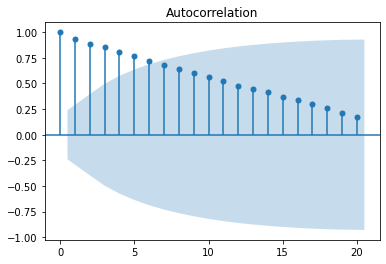

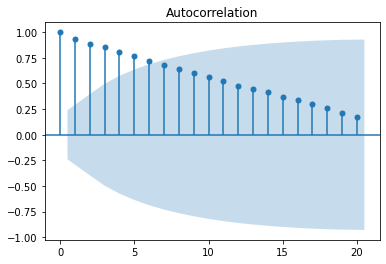

In [73]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df['Production'], lags=20)

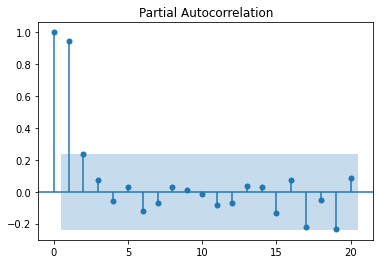

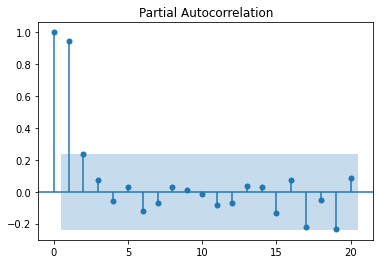

In [74]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df['Production'], lags = 20)

<AxesSubplot:xlabel='Year', ylabel='Production'>

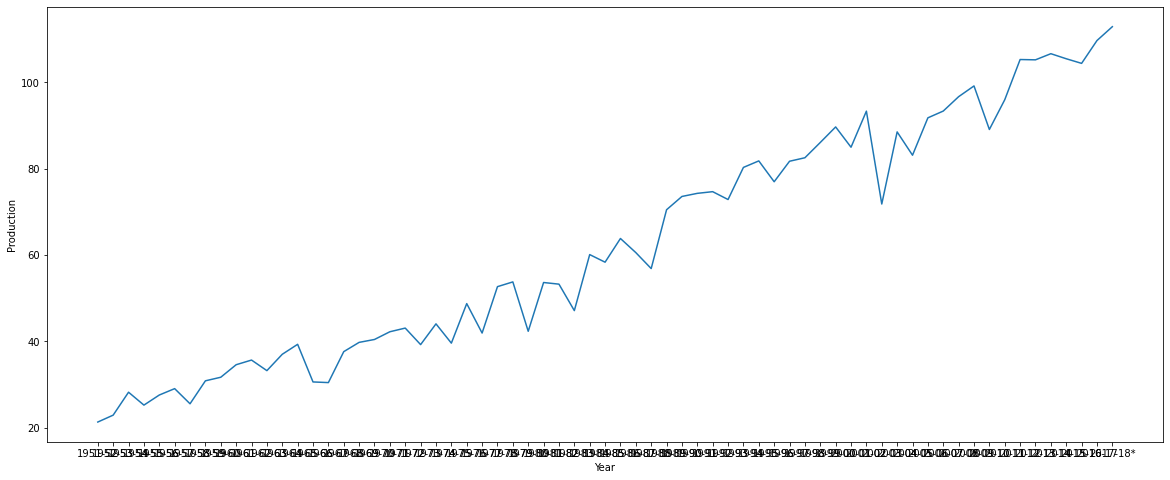

In [75]:
plt.figure(figsize=(20,8))
sns.lineplot(df['Year'], df['Production'])

In [76]:
# Train/Test Split
df_train = df[:61].copy()
df_test = df[61:].copy()

In [77]:
result=seasonal_decompose(df_train['Production'], model='multiplicable', period = 1)

<AxesSubplot:>

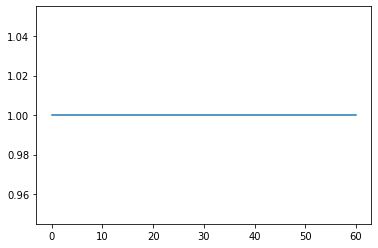

In [78]:
result.seasonal.plot()

<AxesSubplot:>

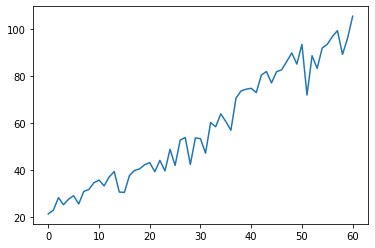

In [79]:
df_train['trend'] = result.trend
df_train['trend'].plot()

<AxesSubplot:>

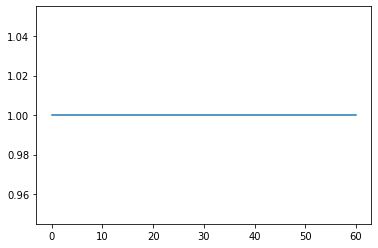

In [80]:
df_train['residual'] = result.resid
df_train['residual'].plot()

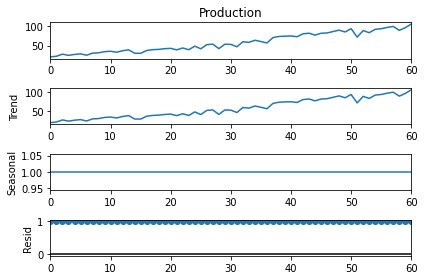

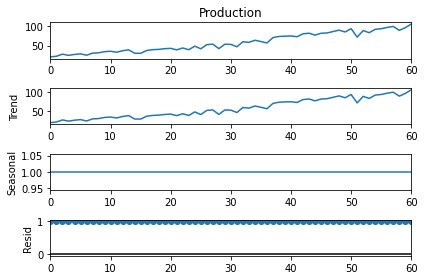

In [81]:
result.plot()

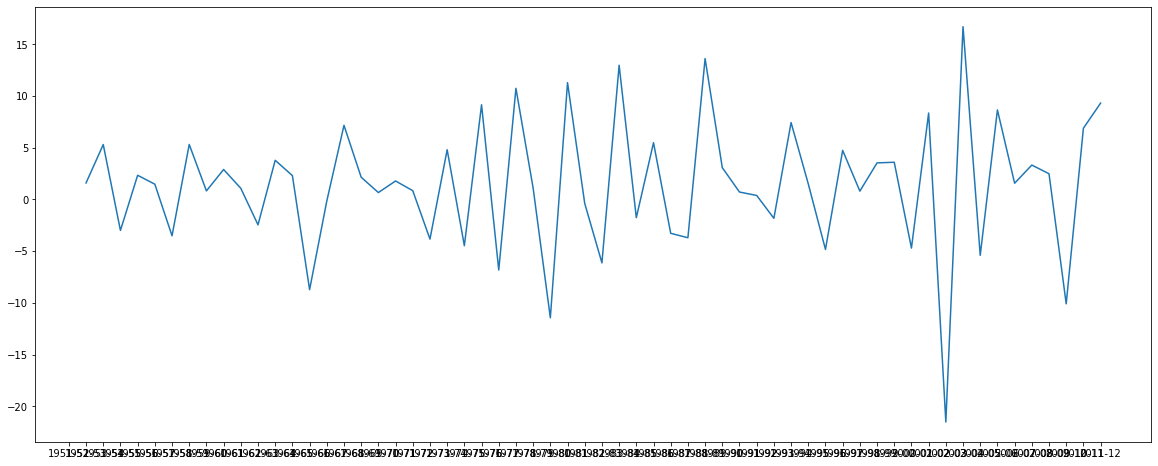

In [82]:
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(8)
df_train['diff_Prod'] = df_train['Production'].diff()
pyplot.plot(df_train['Year'],df_train['diff_Prod'])
pyplot.show()

In [83]:
from statsmodels.tsa.stattools import adfuller

In [84]:
adft = adfuller(df_train['diff_Prod'].dropna(),autolag="AIC")

In [85]:
output_df = pd.DataFrame({"Values":[adft[0],adft[1],adft[2],adft[3], adft[4]['1%'], adft[4]['5%'], adft[4]['10%']] ,
                          "Metric":["Test Statistics","p-value","No. of lags used","Number of observations used", 
                                    "critical value (1%)", "critical value (5%)", "critical value (10%)"]})
print(output_df)

         Values                       Metric
0 -6.200174e+00              Test Statistics
1  5.833169e-08                      p-value
2  3.000000e+00             No. of lags used
3  5.600000e+01  Number of observations used
4 -3.552928e+00          critical value (1%)
5 -2.914731e+00          critical value (5%)
6 -2.595137e+00         critical value (10%)


#### We can see that our data is stationary from the fact that our p-value is less than 5 percent and the test statistic is less than critical value

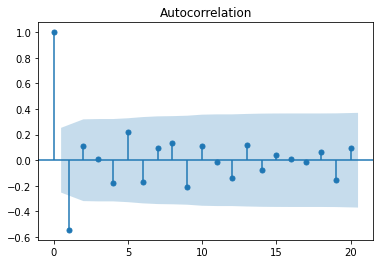

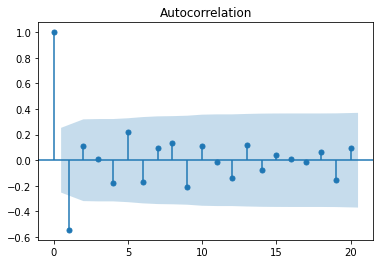

In [86]:
plot_acf(df_train['diff_Prod'].dropna(), lags = 20)

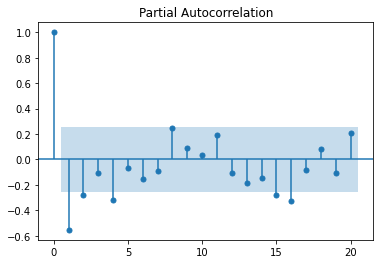

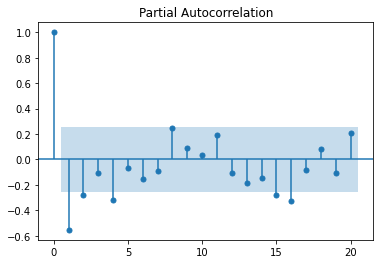

In [87]:
plot_pacf(df_train['diff_Prod'].dropna(), lags = 20)

# ARIMA Fitting

In [88]:
from statsmodels.tsa.arima_model import ARIMA

In [89]:
k = df_train['diff_Prod'].dropna()

In [90]:
arima_value = ARIMA(k, order=(1,0,1))
model1 = arima_value.fit()
print(model1.summary())

                              ARMA Model Results                              
Dep. Variable:              diff_Prod   No. Observations:                   60
Model:                     ARMA(1, 1)   Log Likelihood                -181.250
Method:                       css-mle   S.D. of innovations              4.927
Date:                Thu, 26 May 2022   AIC                            370.500
Time:                        00:03:00   BIC                            378.877
Sample:                             0   HQIC                           373.777
                                                                              
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               1.2930      0.183      7.077      0.000       0.935       1.651
ar.L1.diff_Prod    -0.1561      0.166     -0.943      0.346      -0.481       0.168
ma.L1.diff_Prod    -0.6809      

In [91]:
arima_value = ARIMA(k, order=(2,0,1))
model2 = arima_value.fit()
print(model2.summary())

                              ARMA Model Results                              
Dep. Variable:              diff_Prod   No. Observations:                   60
Model:                     ARMA(2, 1)   Log Likelihood                -181.247
Method:                       css-mle   S.D. of innovations              4.927
Date:                Thu, 26 May 2022   AIC                            372.495
Time:                        00:03:00   BIC                            382.967
Sample:                             0   HQIC                           376.591
                                                                              
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               1.2934      0.182      7.112      0.000       0.937       1.650
ar.L1.diff_Prod    -0.1469      0.208     -0.705      0.481      -0.555       0.262
ar.L2.diff_Prod     0.0129      

In [92]:
arima_value = ARIMA(k, order=(4,0,1))
model3 = arima_value.fit()
print(model3.summary())

                              ARMA Model Results                              
Dep. Variable:              diff_Prod   No. Observations:                   60
Model:                     ARMA(4, 1)   Log Likelihood                -180.078
Method:                       css-mle   S.D. of innovations              4.825
Date:                Thu, 26 May 2022   AIC                            374.155
Time:                        00:03:01   BIC                            388.816
Sample:                             0   HQIC                           379.890
                                                                              
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               1.2980      0.185      7.007      0.000       0.935       1.661
ar.L1.diff_Prod    -0.4101      0.310     -1.322      0.186      -1.018       0.198
ar.L2.diff_Prod    -0.1981      

In [93]:
arima_value = ARIMA(k, order=(15,0,1))
model4 = arima_value.fit()
print(model4.summary())

ValueError: The computed initial AR coefficients are not stationary
You should induce stationarity, choose a different model order, or you can
pass your own start_params.

In [ ]:
arima_value = ARIMA(k, order=(16,0,1))
model5 = arima_value.fit()
print(model5.summary())

In [ ]:
residual = model1.resid

In [ ]:
residuals = pd.DataFrame(model1.resid)
fig, ax = plt.subplots(2,1, figsize = [6,8])
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

In [94]:
df_train

,Year,Area,Production,Yield,Area under Irrigation(%),trend,residual,diff_Prod
0,1951-52,29.83,21.30,714,31.71,21.30,1.0,NaN
1,1952-53,29.97,22.90,764,32.3,22.90,1.0,1.60
2,1953-54,31.29,28.21,902,33.59,28.21,1.0,5.31
3,1954-55,30.77,25.22,820,34.41,25.22,1.0,-2.99
4,1955-56,31.52,27.56,874,34.88,27.56,1.0,2.34
...,...,...,...,...,...,...,...,...
56,2007-08,43.91,96.69,2202,57.73,96.69,1.0,3.33
57,2008-09,45.54,99.18,2178,58.8,99.18,1.0,2.49
58,2009-10,41.92,89.09,2125,56.88,89.09,1.0,-10.09
59,2010-11,42.86,95.98,2239,58.83,95.98,1.0,6.89


In [95]:
df_test

,Year,Area,Production,Yield,Area under Irrigation(%)
61,2012-13,42.75,105.23,2461,58.48
62,2013-14,44.14,106.65,2416,59.65
63,2014-15,44.11,105.48,2391,60.09
64,2015-16,43.50,104.41,2400,-
65,2016-17,43.99,109.70,2494,-
66,2017-18*,43.79,112.91,2578,-


In [96]:
# arima
am = ARIMA(df_train['Production'], order=(1,1,1)) 
t = am.fit()

print(t.summary())

                             ARIMA Model Results                              
Dep. Variable:           D.Production   No. Observations:                   60
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -181.250
Method:                       css-mle   S.D. of innovations              4.927
Date:                Thu, 26 May 2022   AIC                            370.500
Time:                        00:03:02   BIC                            378.877
Sample:                             1   HQIC                           373.777
                                                                              
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  1.2930      0.183      7.077      0.000       0.935       1.651
ar.L1.D.Production    -0.1561      0.166     -0.943      0.346      -0.481       0.168
ma.L1.D.Production  

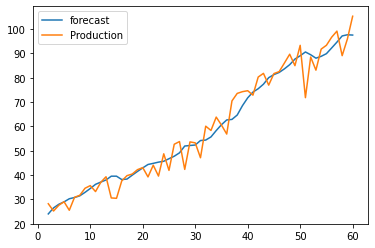

In [97]:
#print(am.value)
t.plot_predict(dynamic=False)
plt.show()

In [98]:
#df_train

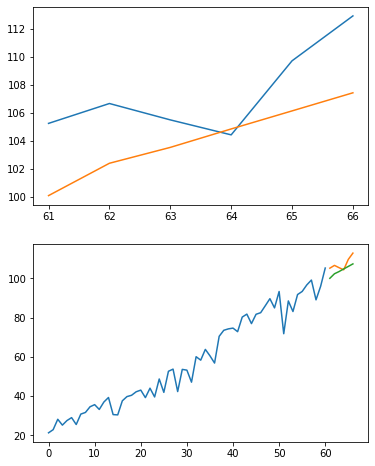

In [99]:
fc, se, cf = t.forecast(len(df_test), alpha = 0.05)

#make pandas series
fc_series = pd.Series(fc, index = df_test.index)
df_test['pred'] = fc


fig, ax = plt.subplots(2,1, figsize = [6,8])

ax[0].plot(df_test.Production)
ax[0].plot(fc_series)

ax[1].plot(df_train.Production)
ax[1].plot(df_test.Production)
ax[1].plot(fc_series)


In [100]:
from sklearn.metrics import mean_squared_error
from math import sqrt
expected = df_test['Production']
predictions = df_test['pred']
mse = mean_squared_error(expected, predictions)
rmse = sqrt(mse)
print('RMSE: %f' % rmse)

RMSE: 3.913735


In [101]:
#future forecast
fc, se, cf = t.forecast(12, alpha = 0.05)
fc

array([100.06909693, 102.38048595, 103.51454257, 104.83237776,
       106.12152558, 107.41515142, 108.70807826, 110.00111421,
       111.29413312, 112.5871547 , 113.88017586, 115.17319709])